### What is MLPs ?
+ MultiProtocol Label Switching (MPLS) là một kỹ thuật để tăng tốc kết nối mạng được phát triển lần đầu vào những năm 1990. Internet công cộng hoạt động bằng cách chuyển tiếp các packet từ router này sang router khác đến khi các packet đến đích. Mặt khác, MPLS gửi các packet theo các đường dẫn mạng được xác định trước. Kết quả là các router tốn ít thời gian hơn để quyến định nơi chuyển tiếp từng packet và các packet luôn đi theo cùng một đường dẫn.
+ Thay vì xác định thị trấn và thành phố nào người ta phải lái xe để đến đích, việc xác định các con đường đi đúng hướng sẽ hiệu quả hơn. Tương tự, MPLS xác định các đường dẫn – “đường” mạng – chứ không phải một loạt các điểm đến trung gian.

In [2]:
import os
import matplotlib.pyplot as plt

IMAGES_PATH = "/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/images"

def save_img(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

2022-08-08 10:47:15.900755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 10:47:15.900792: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

Let's take a look at a sample of the images in the dataset:

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


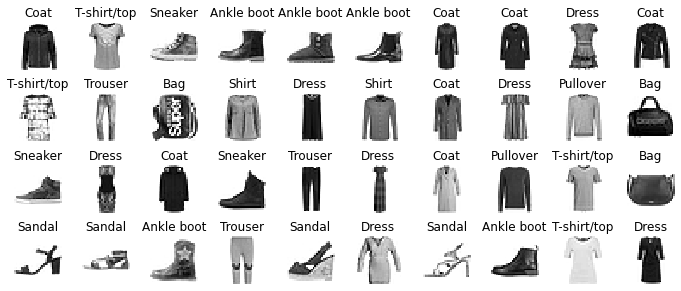

In [8]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_img('fashion_mnist_plot', tight_layout=False)
plt.show()

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

2022-08-08 10:47:19.878103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 10:47:19.878530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 10:47:19.878592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-08 10:47:19.878639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-08 10:47:19.878684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


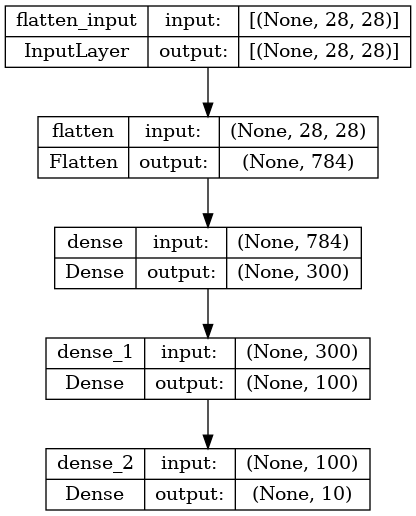

In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2022-08-08 10:47:20.331179: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7350 - accuracy: 0.7567 - val_loss: 0.5091 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4932 - accuracy: 0.8273 - val_loss: 0.4426 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4469 - accuracy: 0.8433 - val_loss: 0.4343 - val_accuracy: 0.8458
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8529 - val_loss: 0.4131 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3987 - accuracy: 0.8594 - val_loss: 0.3897 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3828 - accuracy: 0.8644 - val_loss: 0.3710 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8693 - val_loss: 0.3729 - val_accuracy: 0.8680
Epo

In [15]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [16]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

Saving figure keras_learning_curves_plot


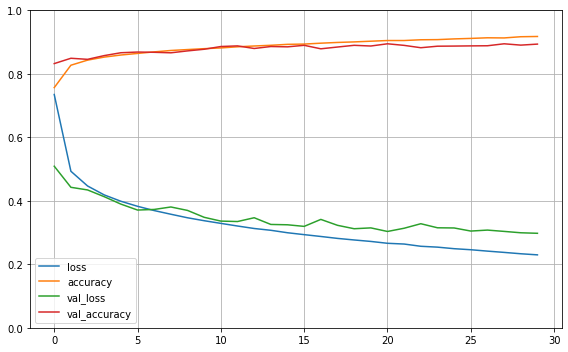

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_img("keras_learning_curves_plot")
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 56.2268 - accuracy: 0.8577


[56.226776123046875, 0.857699990272522]

### Make prediction

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 56ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
import numpy as np
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([9, 2, 1])

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using the Sequential API

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 902us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 905us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 912us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 922us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 911us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 905us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 917us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 905us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - 

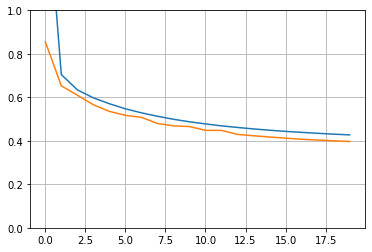

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Function API

## Building Dynamic Models Using the Subclassing API

(8,)